Complete Binary Animation
============================

**NOTE**: animating within Jupyter notebooks can be very resource intensive.  This script will likely run much quicker as a Python script.

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.4 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.4,<2.5"

As always, let's do imports and initialize a logger and a new bundle.

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

Adding Datasets
--------------------

In [3]:
times = np.linspace(0,1,21)

In [4]:
b.add_dataset('lc', times=times, dataset='lc01')

<ParameterSet: 73 parameters | contexts: compute, dataset, constraint, figure>

In [5]:
b.add_dataset('rv', times=times, dataset='rv01')

<ParameterSet: 76 parameters | contexts: compute, dataset, constraint, figure>

In [6]:
b.add_dataset('mesh', times=times, columns=['visibilities', 'intensities@lc01', 'rvs@rv01'], dataset='mesh01')

Thu, 17 Sep 2020 18:27 BUNDLE       WARNING mesh dataset uses 'compute_times' instead of 'times', applying value sent as 'times' to 'compute_times'.


<ParameterSet: 83 parameters | contexts: compute, dataset, constraint, figure>

Running Compute
--------------------

In [7]:
b.run_compute(irrad_method='none')

100%|██████████| 21/21 [00:00<00:00, 57.28it/s]


<ParameterSet: 303 parameters | kinds: lc, mesh, rv>

Plotting
-----------

See the [Animations Tutorial](../tutorials/animations.ipynb) for more examples and details.

Here we'll create a figure with multiple subplots.  The top row will be the light curve and RV curve.  The bottom three subplots will be various representations of the mesh (intensities, rvs, and visibilities).

We'll do this by making separate calls to plot, passing the matplotlib subplot location for each axes we want to create.  We can then call `b.show(animate=True)` or `b.save('anim.gif', animate=True)`.

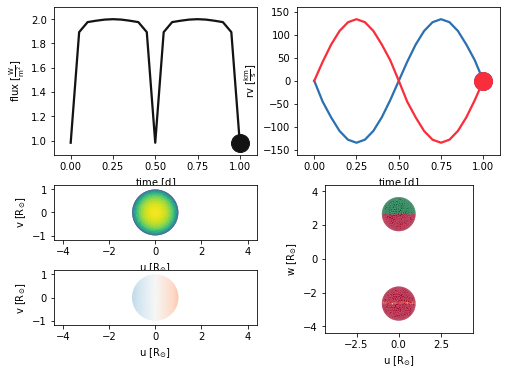

In [8]:
b['lc01@model'].plot(axpos=221)
b['rv01@model'].plot(c={'primary': 'blue', 'secondary': 'red'}, linestyle='solid', axpos=222)
b['mesh@model'].plot(fc='intensities@lc01', ec='None', axpos=425)
b['mesh@model'].plot(fc='rvs@rv01', ec='None', axpos=427)
b['mesh@model'].plot(fc='visibilities', ec='None', y='ws', axpos=224)

fig = plt.figure(figsize=(11,4))
afig, mplanim = b.savefig('animation_binary_complete.gif', fig=fig, tight_layouot=True, draw_sidebars=False, animate=True, save_kwargs={'writer': 'imagemagick'})

![animation](animation_binary_complete.gif)